In [23]:
# -*- coding: utf-8 -*-

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
import seaborn as sns; sns.set_style("darkgrid")
from sklearn import linear_model
import random
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

TEMPERATURA DEL MUNDO SEGÚN EL AÑO

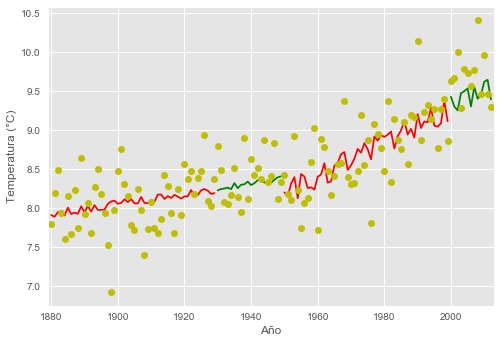

Año  1880
Error de predicción: 0.09
Año  1950
Error de predicción: 0.17
El promedio de todo es: 0.129


In [25]:
df_WT = pd.read_csv('./data/temperaturas/worldTemperature.csv')

ax = sns.tsplot(time=df_WT['x'], data=df_WT['y'], interpolate=False, color="y")
ax.set(xlabel='Año', ylabel='Temperatura (°C)')
sns.plt.show()

def armar_matriz_A(s):
    temp = []
    for t in s:
        temp.append([1, t, np.sin(t**5)])
#        temp.append([t])
    return np.array(temp)

def entrenar_y_predecir_en_rangos(df, rango_entrenamiento, rango_prediccion):
    regr = linear_model.LinearRegression(fit_intercept=False)

    # Entreno el modelo
    df_e = df[df['x'].isin(rango_entrenamiento)]
    A_e = armar_matriz_A(df_e['x'])
    regr.fit(A_e, df_e['y'])

    # Me fijo la aproximación que se realizó
    df_e['p'] = regr.predict(A_e)
    sns.tsplot(time=df_e['x'], data=df_e['p'], color='r')

    # Realizo predicciones
    df_p = df[df['x'].isin(rango_prediccion)]

    A_p = armar_matriz_A(df_p['x'])
    df_p['p'] = regr.predict(A_p)
    sns.tsplot(time=df_p['x'], data=df_p['p'], color='g')

    ECM = sum((df_p['p']-df_p['y'])**2)/len(df_p)
    return ECM

def predecir(k, rango_entrenamiento, rango_prediccion):
    centro = k+rango_entrenamiento
    return entrenar_y_predecir_en_rangos(df_WT, range(k,centro), range(centro, centro+rango_prediccion))


inicio = 1880
ecm_avg = 0
cant = 0
while (inicio <= 1975):
    ECM = predecir(inicio, 50, 20)
    ecm_avg += ECM
    cant += 1
    print("Año ", inicio)
    print("Error de predicción: {:.2f}".format(ECM))
    inicio = inicio + 70
print("El promedio de todo es: {:.3f}".format(ecm_avg/cant))

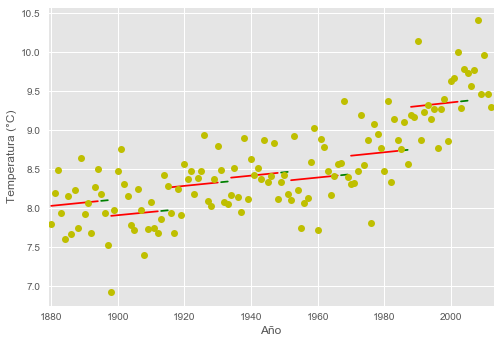

Año  1880
Error de predicción: 0.12
Año  1898
Error de predicción: 0.10
Año  1916
Error de predicción: 0.06
Año  1934
Error de predicción: 0.03
Año  1952
Error de predicción: 0.31
Año  1970
Error de predicción: 0.05
Año  1988
Error de predicción: 0.10
El promedio de todo es: 0.112


In [28]:
df_WT = pd.read_csv('./data/temperaturas/worldTemperature.csv')

ax = sns.tsplot(time=df_WT['x'], data=df_WT['y'], interpolate=False, color="y")
ax.set(xlabel='Año', ylabel='Temperatura (°C)')
sns.plt.show()

def entrenar_y_predecir_en_rangos(df, rango_entrenamiento, rango_prediccion):
    regr = linear_model.LinearRegression(fit_intercept=False)

    # Entreno el modelo
    df_e = df[df['x'].isin(rango_entrenamiento)]
    A_e = armar_matriz_A(df_e['x'])
    regr.fit(A_e, df_e['y'])

    # Me fijo la aproximación que se realizó
    df_e['p'] = regr.predict(A_e)
    sns.tsplot(time=df_e['x'], data=df_e['p'], color='r')

    # Realizo predicciones
    df_p = df[df['x'].isin(rango_prediccion)]

    A_p = armar_matriz_A(df_p['x'])
    df_p['p'] = regr.predict(A_p)
    sns.tsplot(time=df_p['x'], data=df_p['p'], color='g')

    ECM = sum((df_p['p']-df_p['y'])**2)/len(df_p)
    return ECM

def predecir(k, rango_entrenamiento, rango_prediccion):
    centro = k+rango_entrenamiento
    return entrenar_y_predecir_en_rangos(df_WT, range(k,centro), range(centro, centro+rango_prediccion))


inicio = 1880
ecm_avg = 0
cant = 0
while (inicio <= 1995):
    ECM = predecir(inicio, 15, 3)
    ecm_avg += ECM
    cant += 1
    print("Año ", inicio)
    print("Error de predicción: {:.2f}".format(ECM))
    inicio = inicio + 18
print("El promedio de todo es: {:.3f}".format(ecm_avg/cant))

def armar_matriz_A(s):
    temp = []
    for t in s:
        temp.append([t]) #0.112
#        temp.append([1]) #0.118
#        temp.append([1,np.sin(t)]) #0.130
    return np.array(temp)

TEMPERATURA DEL MUNDO SEGUN LA EMISION DE GASES CONTAMINANTE Y SUPERLATIVOS

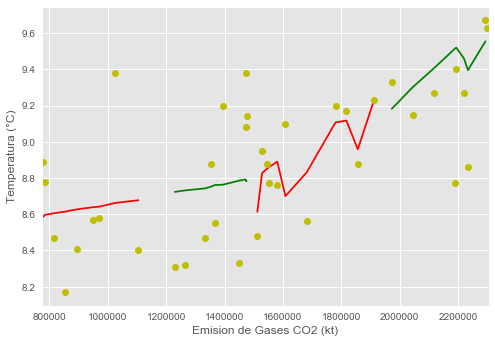

Emision  700000
Error de predicción: 0.14
Emision  1500000
Error de predicción: 0.12
El promedio de todo es: 0.132


In [31]:
def filtrarData(df):
    df = df[df.x >= 1960]
    return df

def filtrarDatos2(df):
    df = df[df.promedio <= 2500000]
    return df

def armar_matriz_A(s):
    temp = []
    for t in s:
        temp.append([1,t, np.cos(t**5)])
    return np.array(temp)


def entrenar_y_predecir_en_rangos(df, desde, entren, predicc):
    regr = linear_model.LinearRegression(fit_intercept=False)
    
    # Entreno el modelo
    df_e = df[[elem >= desde and elem <= entren for elem in df['x']]]
    A_e = armar_matriz_A(df_e['x'])
    regr.fit(A_e, df_e['y'])
    
    # Me fijo la aproximación que se realizó
    df_e['p'] = regr.predict(A_e)
    sns.tsplot(time=df_e['x'], data=df_e['p'], color='r')

    # Realizo predicciones
    df_p = df[[elem > entren and elem <= predicc for elem in df['x']]]
    A_p = armar_matriz_A(df_p['x'])
    df_p['p'] = regr.predict(A_p)
    sns.tsplot(time=df_p['x'], data=df_p['p'], color='g')
    ECM = sum((df_p['p']-df_p['y'])**2)/len(df_p)
    return ECM

def predecir(df, desde, rango_entrenamiento, rango_prediccion):
    return entrenar_y_predecir_en_rangos(df, desde, desde+rango_entrenamiento , desde+rango_entrenamiento+rango_prediccion)

df_Gases = pd.read_csv("./data/emisionGas2.csv")
df_TempTierra = pd.read_csv("./data/temperaturas/worldTemperature.csv")
df_TempTierra = filtrarData(df_TempTierra)
df_TempTierra = df_TempTierra.reset_index(drop = True)
df_Gases['promedio'] = (df_Gases['Argentina'] + df_Gases['China'] + df_Gases['Estados Unidos'] + df_Gases['Japon'] + df_Gases['India'])
df_Gases['promedio'] = df_Gases['promedio']/5
df_Gases['tempTierra'] = df_TempTierra['y']
df_Gases['x'] = df_Gases['promedio']
df_Gases['y'] = df_Gases['tempTierra']

#LIMITO A DONDE MAS INFORMACIÓN TENGO
df_Gases = filtrarDatos2(df_Gases)

#SACO OUTLIERS
def mascara_outliers(s):
    return abs(s - s.mean()) <= 2*s.std()
   
mascara = mascara_outliers(df_Gases['y'])
df_Gases = df_Gases[mascara]

# ~~~~~~~~ IMPRIMO

ax = sns.tsplot(time=df_Gases['promedio'], data=df_Gases['tempTierra'], interpolate=False, color="y")
ax.set(xlabel='Emision de Gases CO2 (kt)', ylabel='Temperatura (°C)')
sns.plt.show()


inicio = 700000
ecm_avg = 0
cant = 0
while (inicio <= 2000000):
    ECM = predecir(df_Gases, inicio, 450000, 350000)
    ecm_avg += ECM
    cant += 1
    print("Emision ", inicio)
    print("Error de predicción: {:.2f}".format(ECM))
    inicio = inicio + 800000
print("El promedio de todo es: {:.3f}".format(ecm_avg/cant))



# DADO 3 PAISES SU TEMPERATURA

In [32]:
#LEO LOS CSV

df_Ar = pd.read_csv('./data/temperaturapaisespromedios/ARPromedio.csv')
df_Eu = pd.read_csv('./data/temperaturapaisespromedios/EuPromedio.csv')
df_Ch = pd.read_csv('./data/temperaturapaisespromedios/CHPromedio.csv')

#DEFINO FUNCIONES#

def entrenar_y_predecir_en_rangos(df, desde, entrenam, predicc):
    regr = linear_model.LinearRegression(fit_intercept=False)
    
    # Entreno el modelo
    df_e = df[[elem > desde and elem <=  entrenam for elem in df['Emision']]]
    A_e = armar_matriz_A(df_e['Emision'])
    regr.fit(A_e, df_e['Temperatura'])
    # Me fijo la aproximación que se realizó
    df_e['p'] = regr.predict(A_e)
    sns.tsplot(time=df_e['Emision'], data=df_e['p'], color='r')

    # Realizo predicciones
    df_p = df[[elem > entrenam and elem <= predicc for elem in df['Emision']]]
    A_p = armar_matriz_A(df_p['Emision'])
    df_p['p'] = regr.predict(A_p)
    sns.tsplot(time=df_p['Emision'], data=df_p['p'], color='g')
    ECM = sum((df_p['p']-df_p['Temperatura'])**2)/len(df_p)
    return ECM

def predecir_paises(df, desde, rango_entrenamiento, rango_prediccion):
    return entrenar_y_predecir_en_rangos(df, desde, desde+rango_entrenamiento , desde+rango_entrenamiento+rango_prediccion)

CHINA

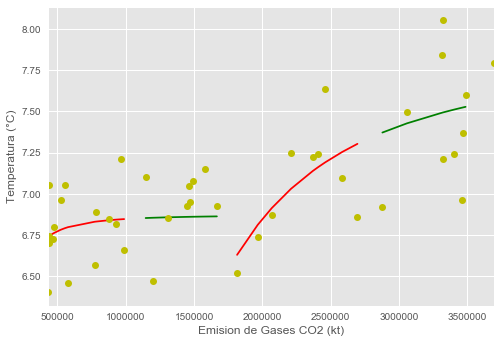

Emision  50000
Error de predicción: 0.04
Emision  1800000
Error de predicción: 0.13
El promedio de todo es: 0.085


In [35]:
def filtrarDatos2(df):
    df = df[df.Emision <= 4000000]
    return df


def armar_matriz_A(s):
    temp = []
    for t in s:
        temp.append([1,1/t**2])
    return np.array(temp)

df_Ch = filtrarDatos2(df_Ch)

ax = sns.tsplot(time=df_Ch['Emision'], data=df_Ch['Temperatura'], interpolate=False, color = "y")
ax.set(xlabel='Emision de Gases CO2 (kt)', ylabel='Temperatura (°C)')
sns.plt.show()

inicio = 50000
ecm_avg_ch = 0
cant = 0
while (inicio <= 2750000):
    ECM = predecir_paises(df_Ch, inicio, 1000000, 750000)
    ecm_avg_ch += ECM
    cant += 1
    print("Emision ", inicio)
    print("Error de predicción: {:.2f}".format(ECM))
    inicio = inicio + 1750000
print("El promedio de todo es: {:.3f}".format(ecm_avg_ch/cant))


ESTADOS UNIDOS

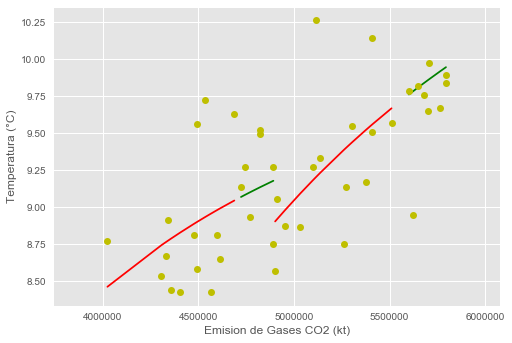

Emision  4000000
Error de predicción: 0.08
Emision  4900000
Error de predicción: 0.09
El promedio de todo es: 0.084


In [38]:
def armar_matriz_A(s):
    temp = []
    for t in s:
         temp.append([1,1/t**2])
    return np.array(temp)

def filtrarDatos3(df):
    df = df[df.Emision >= 4000000]
    return df

ax = sns.tsplot(time=df_Eu['Emision'], data=df_Eu['Temperatura'], interpolate=False, color = "y")
ax.set(xlabel='Emision de Gases CO2 (kt)', ylabel='Temperatura (°C)')
sns.plt.show()

#print(df_Eu)
df_Eu = filtrarDatos3(df_Eu)
#print(df_Eu)

#ECM = predecir_paises(df_Eu, 4000000, 750000, 250000)
#print("Error de predicción: {:.2f}".format(ECM))

#ECM = predecir_paises(df_Eu, 4750000, 750000, 250000)
#print("Error de predicción: {:.2f}".format(ECM))

inicio = 4000000
ecm_avg_eu = 0
cant = 0
while (inicio <= 5000000):
    ECM = predecir_paises(df_Eu, inicio, 700000, 200000)
    ecm_avg_eu += ECM
    cant += 1
    print("Emision ", inicio)
    print("Error de predicción: {:.2f}".format(ECM))
    inicio = inicio + 900000
print("El promedio de todo es: {:.3f}".format(ecm_avg_eu/cant))


ARGENTINA

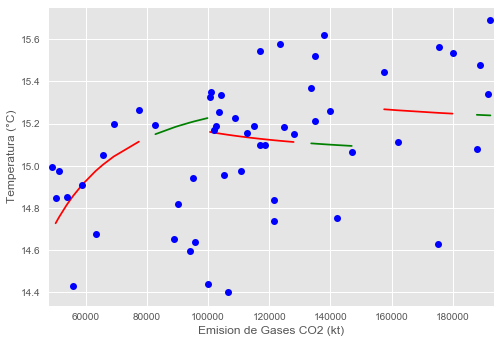

Emision  50000
Error de predicción: 0.26
Emision  100000
Error de predicción: 0.10
Emision  150000
Error de predicción: 0.07
El promedio de todo es: 0.143


In [41]:
def armar_matriz_A(s):
    temp = []
    for t in s:
       temp.append([1,1/t**2])
    return np.array(temp)


ax = sns.tsplot(time=df_Ar['Emision'], data=df_Ar['Temperatura'], interpolate=False, color = "b")
ax.set(xlabel='Emision de Gases CO2 (kt)', ylabel='Temperatura (°C)')
sns.plt.show()


inicio = 50000
ecm_avg_ar = 0
cant = 0
while (inicio <= 150000):
    ECM = predecir_paises(df_Ar, inicio, 30000, 20000 )
    ecm_avg_ar += ECM
    cant += 1
    print("Emision ", inicio)
    print("Error de predicción: {:.2f}".format(ECM))
    inicio = inicio + 50000
print("El promedio de todo es: {:.3f}".format(ecm_avg_ar/cant))

In [8]:
error_promedio_total = (ecm_avg_ar + ecm_avg_eu + ecm_avg_ch)/3
print("Error Promedio = {:.3f}".format(error_promedio_total))

Error Promedio = 0.911


In [43]:

def filtrarDatos2(df):
    df = df[df.Emision <= 4000000]
    return df

df_Ch = filtrarDatos2(df_Ch)


inicio = 50000
ecm_avg_ch = 0
cant = 0
while (inicio <= 2750000):
    ECM = predecir_paises(df_Ch, inicio, 1000000, 750000)
    ecm_avg_ch += ECM
    cant += 1
    print("Emision ", inicio)
    print("Error de predicción: {:.2f}".format(ECM))
    inicio = inicio + 1750000
print("El promedio de todo es: {:.3f}".format(ecm_avg_ch/cant))

#########################

def filtrarDatos3(df):
    df = df[df.Emision >= 4000000]
    return df

df_Eu = filtrarDatos3(df_Eu)



inicio = 4000000
ecm_avg_eu = 0
cant = 0
while (inicio <= 5000000):
    ECM = predecir_paises(df_Eu, inicio, 700000, 200000)
    ecm_avg_eu += ECM
    cant += 1
    print("Emision ", inicio)
    print("Error de predicción: {:.2f}".format(ECM))
    inicio = inicio + 900000
print("El promedio de todo es: {:.3f}".format(ecm_avg_eu/cant))


#########################

inicio = 50000
ecm_avg_ar = 0
cant = 0
while (inicio <= 150000):
    ECM = predecir_paises(df_Ar, inicio, 30000, 20000 )
    ecm_avg_ar += ECM
    cant += 1
    print("Emision ", inicio)
    print("Error de predicción: {:.2f}".format(ECM))
    inicio = inicio + 50000
print("El promedio de todo es: {:.3f}".format(ecm_avg_ar/cant))


error_promedio_total = (ecm_avg_ar + ecm_avg_eu + ecm_avg_ch)/3
print("Error Promedio = {:.3f}".format(error_promedio_total))

def armar_matriz_A(s):
    temp = []
    for t in s:
#        temp.append([1]) #0.329
#        temp.append([t]) #42.675
#        temp.append([log(t)]) #0.471
#        temp.append([np.sin(t)]) #354.820
#        temp.append([np.cos(t)]) #337.791
#        temp.append([np.tan(t)]) #10032.314
#        temp.append([t**123]) #0.471 CUALQUIER POLINOMIO NO MODIFICA ESTE NUMERO
#        temp.append([1/t]) #23.708


#        temp.append([1,log(t)]) #0.327
#        temp.append([1,t]) #0.395
#        temp.append([1,t**23]) #0.502
#        temp.append([1,np.sin(t)]) #0.349
#        temp.append([1,np.cos(t)]) #0.327
#        temp.append([1,np.tan(t)]) #10.359


#        temp.append([1,1/t,log(t)]) #2.670
#        temp.append([1,log(t),t]) #3.806
#        temp.append([1,log(t),np.sin(t)]) #0.365
#        temp.append([1,log(t),np.cos(t)]) #0.374
#        temp.append([1,log(t),np.tan(t)]) #23.526
#        temp.append([1,log(t),t**4]) #1402.764
    

#        temp.append([t,1/t,log(t)]) #3.114
#        temp.append([t,log(t),t]) #0.350
#        temp.append([t,log(t),np.sin(t)]) #0.384
#        temp.append([t,log(t),np.cos(t)]) #0.399
#        temp.append([t,log(t),np.tan(t)]) #24.179
#        temp.append([t,log(t),t**4]) #851.775


#        temp.append([1,log(t), np.sin(t)]) #0.365

#        temp.append([1,1/t]) #0.283
        temp.append([1,1/t**2]) #0.2550
#        temp.append([1,1/np.sin(t)]) #0.2550
#        temp.append([1,1/np.cos(t)]) #1.158


    return np.array(temp)


Emision  50000
Error de predicción: 0.04
Emision  1800000
Error de predicción: 0.13
El promedio de todo es: 0.085
Emision  4000000
Error de predicción: 0.08
Emision  4900000
Error de predicción: 0.09
El promedio de todo es: 0.084
Emision  50000
Error de predicción: 0.26
Emision  100000
Error de predicción: 0.10
Emision  150000
Error de predicción: 0.07
El promedio de todo es: 0.143
Error Promedio = 0.255
